In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Embedding,SimpleRNN,LSTM,GRU
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

# pad sequence of same length
x_train=pad_sequences(x_train,maxlen=100)
x_test=pad_sequences(x_test,maxlen=100)

In [6]:
x_train.shape

(25000, 100)

# RNN

model

In [8]:
model=Sequential()
model.add(Embedding(10000,32,input_length=100)) # adding embedding layer to convert word to vector where every word made up with 32 numbers
model.add(SimpleRNN(5,return_sequences=True)) #adding 1st layer 
model.add(SimpleRNN(5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100, 5)            190       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

In [18]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=.2)

Epoch 1/10
  1/625 [..............................] - ETA: 13s - loss: 1.5078e-04 - accuracy: 1.0000

625/625 [==============================] - 10s 16ms/step - loss: 9.5867e-04 - accuracy: 0.9998 - val_loss: 1.6258 - val_accuracy: 0.7512
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 2.2590e-04 - accuracy: 1.0000 - val_loss: 1.6584 - val_accuracy: 0.7526
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 1.5787e-04 - accuracy: 1.0000 - val_loss: 1.6894 - val_accuracy: 0.7538
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 1.2540e-04 - accuracy: 1.0000 - val_loss: 1.7005 - val_accuracy: 0.7536
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 9.4971e-05 - accuracy: 1.0000 - val_loss: 1.7474 - val_accuracy: 0.7546
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 7.1535e-05 - accuracy: 1.0000 - val_loss: 1.7873 - val_accuracy: 0.7560
Epoch 7/10
625/625 [==============================] - 10s 15ms/step - loss: 5.4050e-05 - accuracy: 1.0000 - val_loss: 1.832

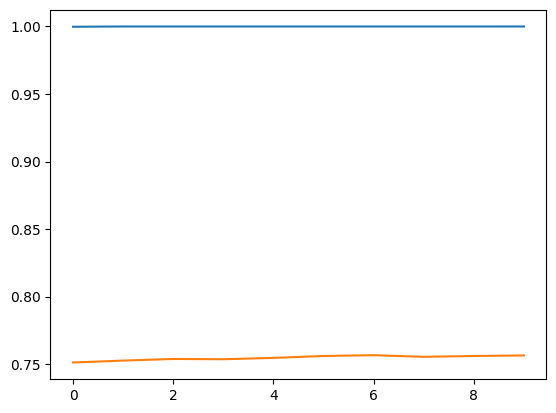

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

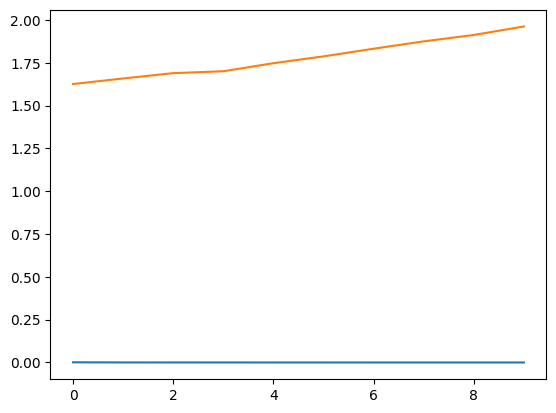

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Deep LSTM

In [14]:
model2=Sequential()
model2.add(Embedding(10000,32,input_length=100)) # adding embedding layer to convert word to vector where every word made up with 32 numbers
model2.add(LSTM(5,return_sequences=True)) #adding 1st layer 
model2.add(LSTM(5))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 100, 5)            760       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320986 (1.22 MB)
Trainable params: 320986 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

In [26]:
history2=model2.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=.2)

Epoch 1/10


625/625 [==============================] - 16s 25ms/step - loss: 0.0695 - accuracy: 0.9815 - val_loss: 0.5980 - val_accuracy: 0.8302
Epoch 2/10
625/625 [==============================] - 16s 26ms/step - loss: 0.0535 - accuracy: 0.9849 - val_loss: 0.6513 - val_accuracy: 0.8320
Epoch 3/10
625/625 [==============================] - 16s 26ms/step - loss: 0.0450 - accuracy: 0.9884 - val_loss: 0.7223 - val_accuracy: 0.8258
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 0.0397 - accuracy: 0.9895 - val_loss: 0.7260 - val_accuracy: 0.8272
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.0322 - accuracy: 0.9920 - val_loss: 0.7555 - val_accuracy: 0.8272
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.0281 - accuracy: 0.9930 - val_loss: 0.7639 - val_accuracy: 0.8262
Epoch 7/10
625/625 [==============================] - 16s 26ms/step - loss: 0.0220 - accuracy: 0.9952 - val_loss: 0.8172 - val_accuracy: 0.8246
Epo

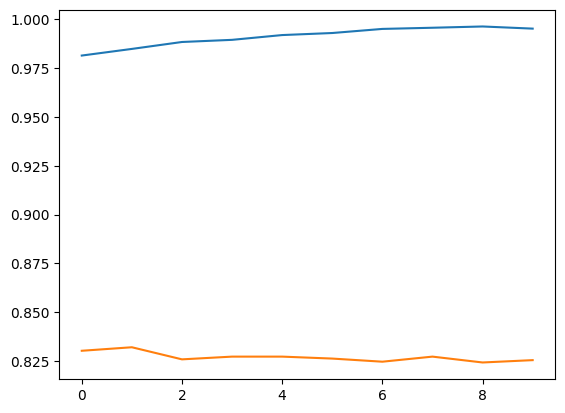

In [34]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

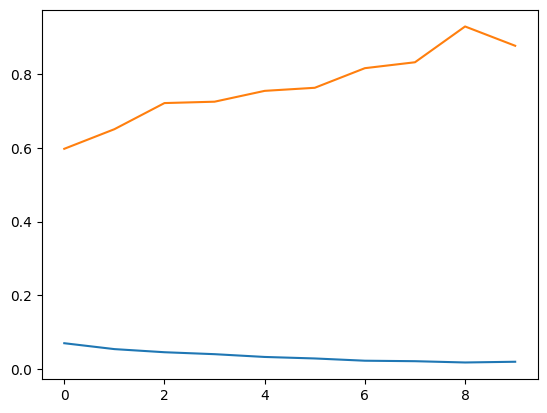

In [35]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

# Deep GRU

In [27]:
model3=Sequential()
model3.add(Embedding(10000,32,input_length=100)) # adding embedding layer to convert word to vector where every word made up with 32 numbers
model3.add(GRU(5,return_sequences=True)) #adding 1st layer 
model3.add(GRU(5))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru_4 (GRU)                 (None, 100, 5)            585       
                                                                 
 gru_5 (GRU)                 (None, 5)                 180       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320771 (1.22 MB)
Trainable params: 320771 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model3.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

In [30]:
history3=model3.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=.2)

Epoch 1/10


625/625 [==============================] - 18s 25ms/step - loss: 0.4902 - accuracy: 0.7502 - val_loss: 0.3726 - val_accuracy: 0.8388
Epoch 2/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2817 - accuracy: 0.8870 - val_loss: 0.3556 - val_accuracy: 0.8510
Epoch 3/10
625/625 [==============================] - 15s 24ms/step - loss: 0.1993 - accuracy: 0.9283 - val_loss: 0.3910 - val_accuracy: 0.8412
Epoch 4/10
625/625 [==============================] - 15s 24ms/step - loss: 0.1458 - accuracy: 0.9509 - val_loss: 0.4489 - val_accuracy: 0.8328
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.1033 - accuracy: 0.9675 - val_loss: 0.4966 - val_accuracy: 0.8362
Epoch 6/10
625/625 [==============================] - 18s 28ms/step - loss: 0.0749 - accuracy: 0.9782 - val_loss: 0.5798 - val_accuracy: 0.8298
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.0587 - accuracy: 0.9830 - val_loss: 0.6349 - val_accuracy: 0.8284
Epo

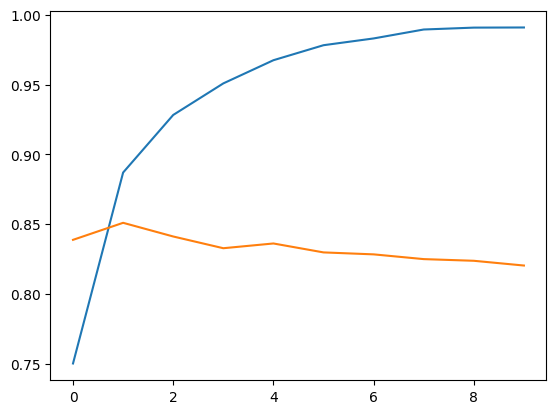

In [36]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

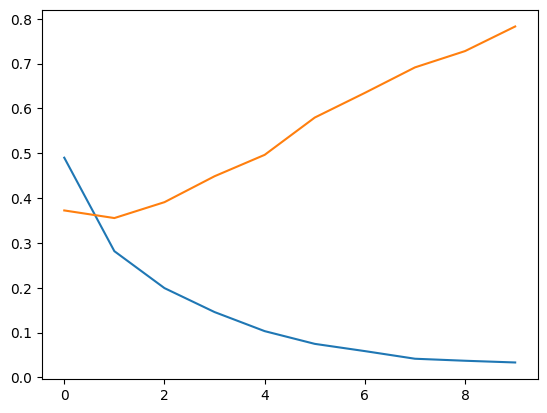

In [37]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])